In [ ]:
#! pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\a3654\appdata\local\temp\pip-req-build-sxf3toha
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36830 sha256=6431cee34329061f0328d6da0966c86c0eb6f5fcba4ab0441b43c298878576ec
  Stored in directory: C:\Users\a3654\AppData\Local\Temp\pip-ephem-wheel-cache-odtwsurt\wheels\d5\11\03\7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment_anything


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\a3654\AppData\Local\Temp\pip-req-build-sxf3toha'


In [4]:
#! pip install -q git+https://github.com/huggingface/transformers.git

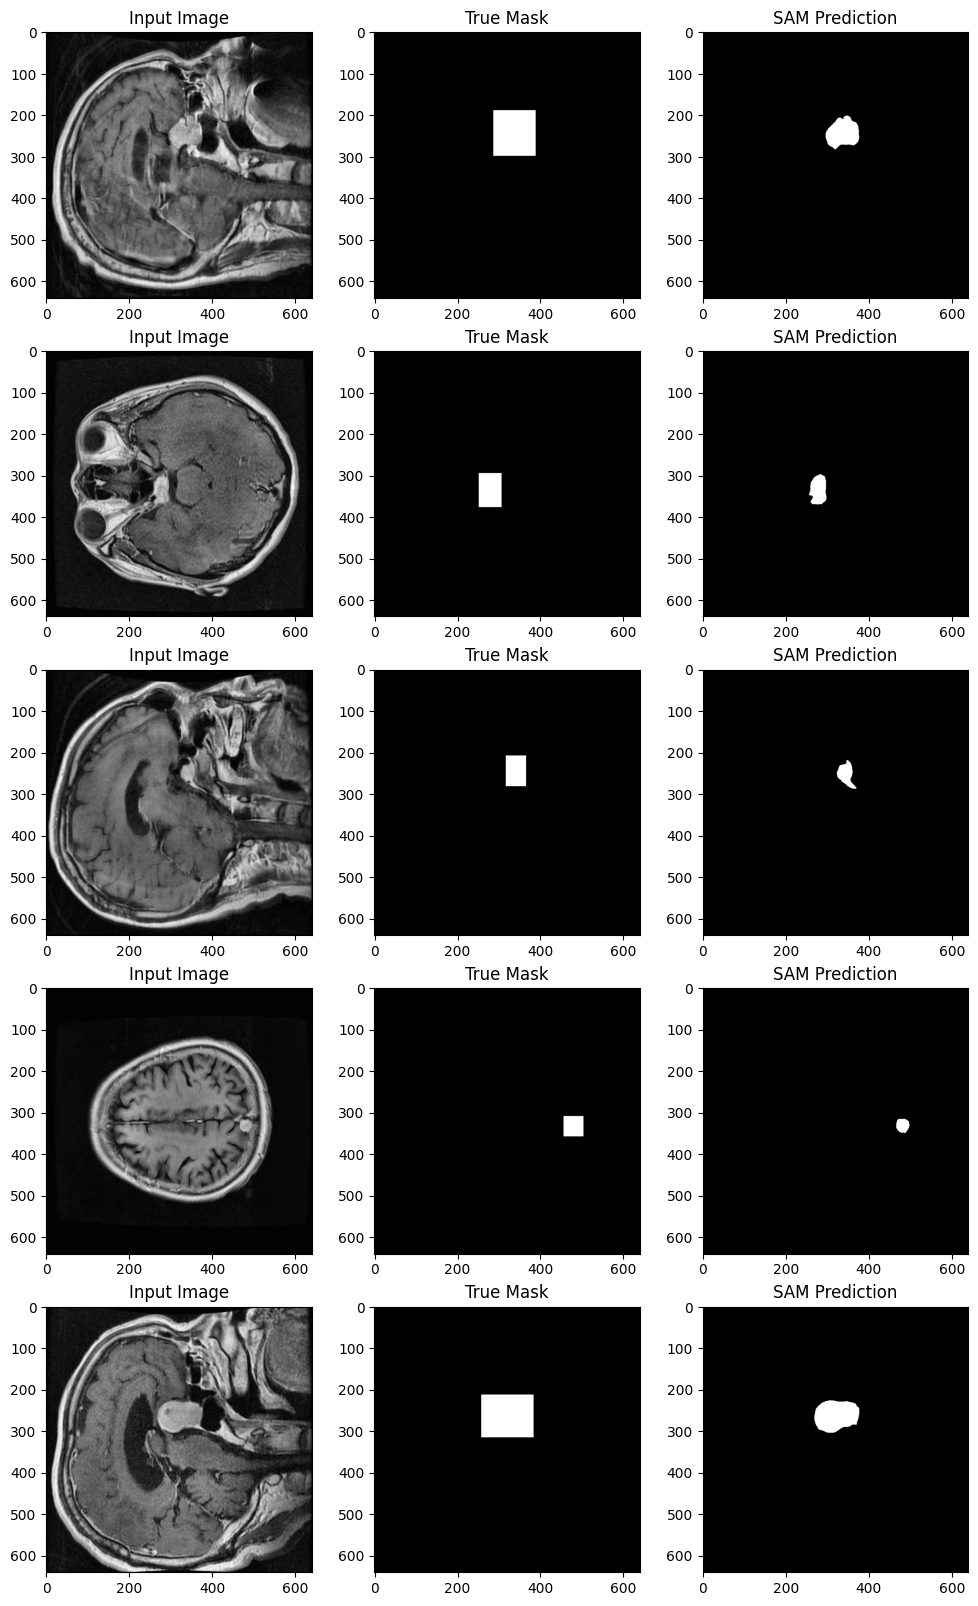

In [15]:
import os 
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# 路徑設定
train_path = 'D:\\deep_learning_final\\train\\'
test_path = "D:\\deep_learning_final\\test\\"
valid_path = 'D:\\deep_learning_final\\valid\\'

# 加載標註文件
def load_annotations(path):
    annotation_path = os.path.join(path, "_annotations.coco.json")
    with open(annotation_path, 'r') as f:
        annotations = json.load(f)
    return annotations

test_annotation = load_annotations(test_path)

# SAM 初始化
sam_checkpoint = "D:\\deep_learning_final\\models\\sam_vit_h_4b8939.pth"  # 替換為您的權重路徑
model_type = "vit_h"  # 可選 vit_b, vit_l, vit_h
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

def prepare_sam_input(image_path, annotation):
    # 讀取圖片
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 設置圖像給 SAM Predictor
    predictor.set_image(image)

    # 提取 bbox，並將其從 [x_min, y_min, width, height] 轉為 [x_min, y_min, x_max, y_max]
    bbox = annotation['bbox']  # bbox 格式為 [x_min, y_min, width, height]
    x_min, y_min, width, height = bbox
    x_max = x_min + width
    y_max = y_min + height
    bbox = np.array([x_min, y_min, x_max, y_max])  # 轉換為 NumPy 數組

    # 獲取分割結果
    masks, _, _ = predictor.predict(box=bbox)
    return masks[0]


# 測試隨機圖像
def test_random_images_with_sam(n=5):
    # 隨機選擇 n 個測試圖像
    indices = np.random.randint(0, len(test_annotation['images']), size=n)
    images = [test_annotation['images'][i] for i in indices]
    annotations = [test_annotation['annotations'][i] for i in indices]

    plt.figure(figsize=(12, 2 * 2 * n))
    j = 1

    for img, ann in zip(images, annotations):
        plt.subplot(n, 3, j)
        j += 1

        # 讀取測試圖像
        image_path = test_path + img['file_name']
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Input Image")

        # 使用 SAM 進行分割
        mask = prepare_sam_input(image_path, ann)

        # 顯示 Ground Truth 掩膜
        true_mask_path = 'D:\\deep_learning_final\\test_masks\\' + img['file_name']
        true_mask = cv2.imread(true_mask_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(n, 3, j)
        j += 1
        plt.imshow(true_mask, cmap='gray')
        plt.title("True Mask")

        # 顯示 SAM 的分割結果
        plt.subplot(n, 3, j)
        j += 1
        plt.imshow(mask, cmap='gray')
        plt.title("SAM Prediction")

# 執行測試
test_random_images_with_sam()